<a href="https://colab.research.google.com/github/negovanovic-e/automatska-kategorizacija-proizvoda/blob/main/01_analiza_podataka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving products.csv to products.csv


In [2]:
# Učitaj podatke
df = pd.read_csv('products.csv')

# Pregled podataka
print("DIMENZIJE PODATAKA:")
print(f"Redovi: {df.shape[0]}, Stupci: {df.shape[1]}")

print("\nPRVIH 5 REDAKA:")
print(df.head())

print("\nINFORMACIJE O STUPCIMA:")
print(df.info())

DIMENZIJE PODATAKA:
Redovi: 35311, Stupci: 8

PRVIH 5 REDAKA:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/202


BROJ PROIZVODA PO KATEGORIJI:
 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64

UKUPNO RAZLIČITIH KATEGORIJA: 13


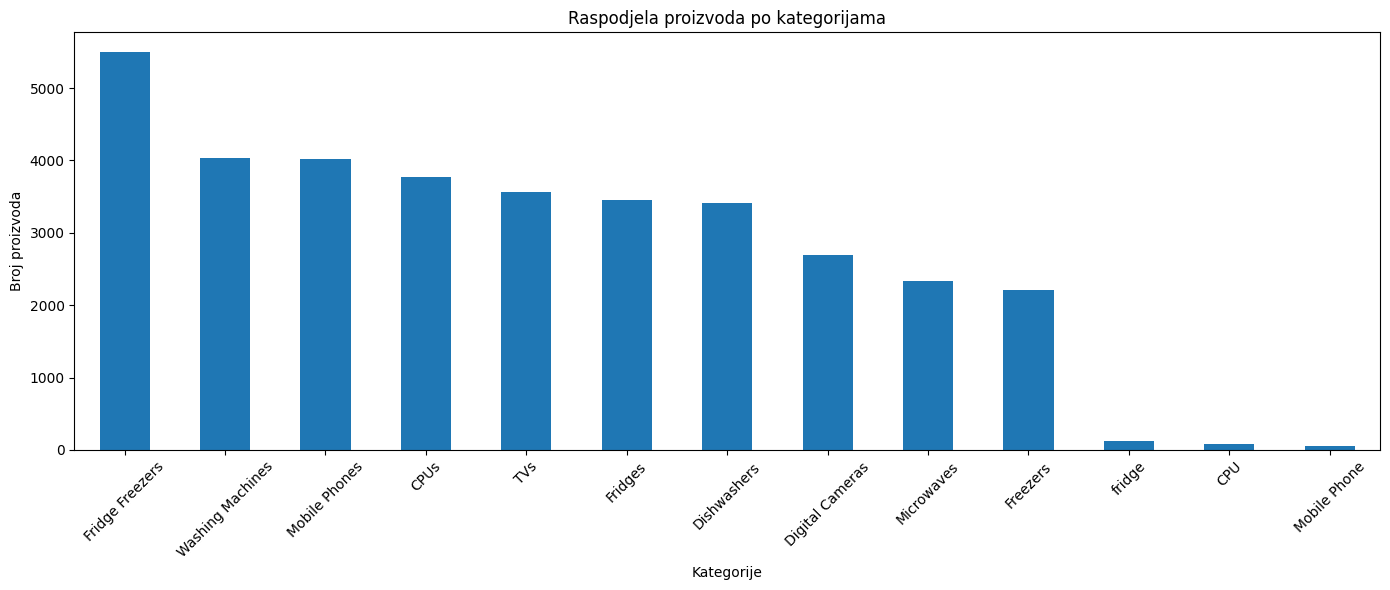

In [4]:
#Analiza kategorija
print("\nBROJ PROIZVODA PO KATEGORIJI:")
category_counts = df[' Category Label'].value_counts()
print(category_counts)

print(f"\nUKUPNO RAZLIČITIH KATEGORIJA: {len(category_counts)}")

# Vizualizacija kategorija
plt.figure(figsize=(14, 6))
if len(category_counts) > 20:
    # Prikaži samo top 20 kategorija
    category_counts.head(20).plot(kind='bar')
    plt.title('Top 20 kategorija proizvoda')
else:
    category_counts.plot(kind='bar')
    plt.title('Raspodjela proizvoda po kategorijama')
plt.xlabel('Kategorije')
plt.ylabel('Broj proizvoda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Analiza naziva proizvoda
print("\nANALIZA NAZIVA PROIZVODA:")
df['title_length'] = df['Product Title'].str.len()
print(f"Prosječna dužina naziva: {df['title_length'].mean():.2f} znakova")
print(f"Najkraći naziv: {df['title_length'].min()} znakova")
print(f"Najduži naziv: {df['title_length'].max()} znakova")

# Prikaz najčešćih kategorija
print("\nTOP 10 NAJČEŠĆIH KATEGORIJA:")
print(category_counts.head(10))

# Informacije o nedostajućim podacima
print("\nDETALJI O NEDOSTAJUĆIM PODACIMA:")
total_rows = len(df)
print(f"Ukupno redova: {total_rows}")

for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        percentage = (missing / total_rows) * 100
        print(f"'{col}': {missing} nedostajućih ({percentage:.2f}%)")


ANALIZA NAZIVA PROIZVODA:
Prosječna dužina naziva: 52.98 znakova
Najkraći naziv: 5.0 znakova
Najduži naziv: 200.0 znakova

TOP 10 NAJČEŠĆIH KATEGORIJA:
 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
Name: count, dtype: int64

DETALJI O NEDOSTAJUĆIM PODACIMA:
Ukupno redova: 35311
'Product Title': 172 nedostajućih (0.49%)
' Category Label': 44 nedostajućih (0.12%)
'_Product Code': 95 nedostajućih (0.27%)
'Number_of_Views': 14 nedostajućih (0.04%)
'Merchant Rating': 170 nedostajućih (0.48%)
' Listing Date  ': 59 nedostajućih (0.17%)
'title_length': 172 nedostajućih (0.49%)
